# **Reading the dataset and generating the statistical description**

First, you must import the data set into the interface as a pandas data frame. To complete the first objective, you can further generate a statistical description of the data set.

The data set is now assumed to be completely prepared and ready for exploratory data analysis. The headers for the data set must be in the first row of the CSV file.

To read the CSV file to a data frame and a generate statistical description of the data set, provide the generative AI model with the following prompt.

Write a python code to perform the following actions.
1. Import a data set from a CSV file, The headers for the data set must be in the first row of the CSV file.
2. Generate the statistical description of all the features used in the data set. Include "object" data types as well.

In [2]:
import pandas as pd

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

# 1. Import a data set from a CSV file
data = pd.read_csv(URL)

# 2. Generate the statistical description of all the features
description = data.describe(include='all')

print(description)

        Unnamed: 0.1  Unnamed: 0 Manufacturer    Category         GPU  \
count     238.000000  238.000000          238  238.000000  238.000000   
unique           NaN         NaN           11         NaN         NaN   
top              NaN         NaN         Dell         NaN         NaN   
freq             NaN         NaN           71         NaN         NaN   
mean      118.500000  118.500000          NaN    3.205882    2.151261   
std        68.848868   68.848868          NaN    0.776533    0.638282   
min         0.000000    0.000000          NaN    1.000000    1.000000   
25%        59.250000   59.250000          NaN    3.000000    2.000000   
50%       118.500000  118.500000          NaN    3.000000    2.000000   
75%       177.750000  177.750000          NaN    4.000000    3.000000   
max       237.000000  237.000000          NaN    5.000000    3.000000   

                OS    CPU_core  Screen_Size_inch  CPU_frequency      RAM_GB  \
count   238.000000  238.000000        238.00

# **Creating parameter visualizations** 

Next, you decided that you need to see the distribution of various attributes against the target attribute. The target attribute, in this case, is Price. Different forms of visualizations are for different types of attributes. Attributes with continuous values use regression plots, and the attributes with categorical values use box plots.
You can provide the generative AI model with a list of continuous values and another list of categorical values within a single prompt and ask the model to create a code that generates these plots.

The attributes with continuous values are CPU_frequency, Screen_Size_inch and Weight_pounds.
The attributes with categorical values are Category, GPU, OS, CPU_core, RAM_GB and Storage_GB_SSD.

Create the following prompt:

Write a Python code to perform the following actions.
1. Create regression plots for the attributes "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price".
2. Create box plots for the attributes "Category", "GPU", "OS", "CPU_core", "RAM_GB" and "Storage_GB_SSD" against the attribute "Price".

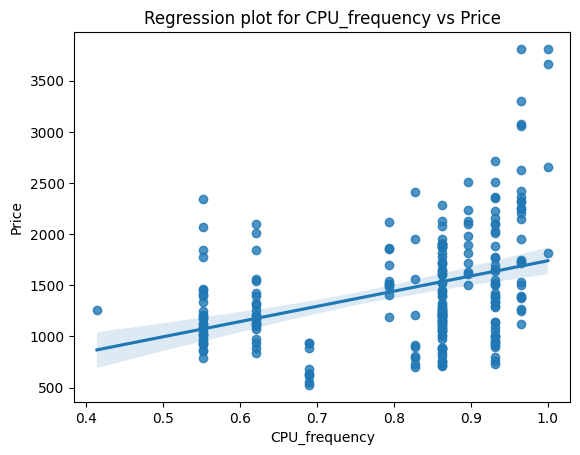

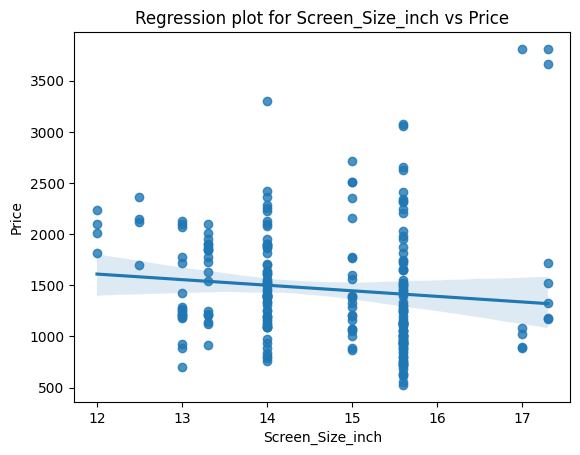

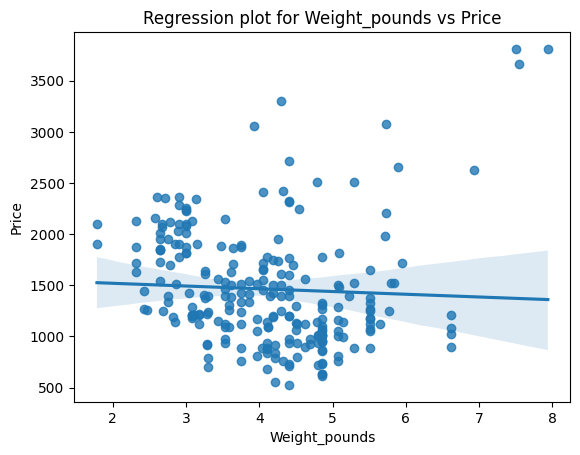

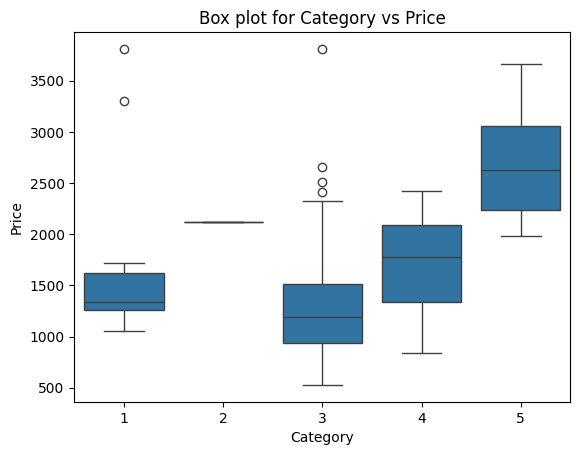

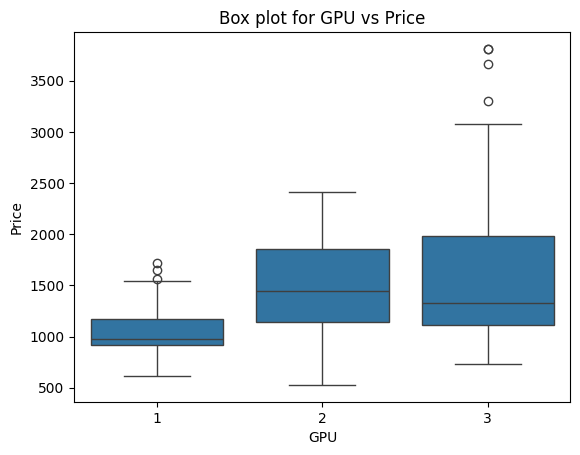

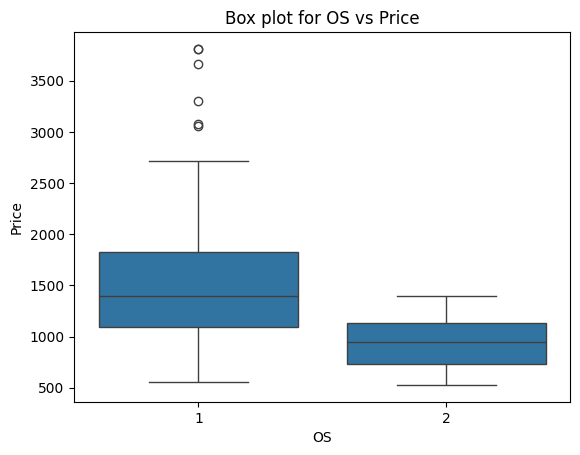

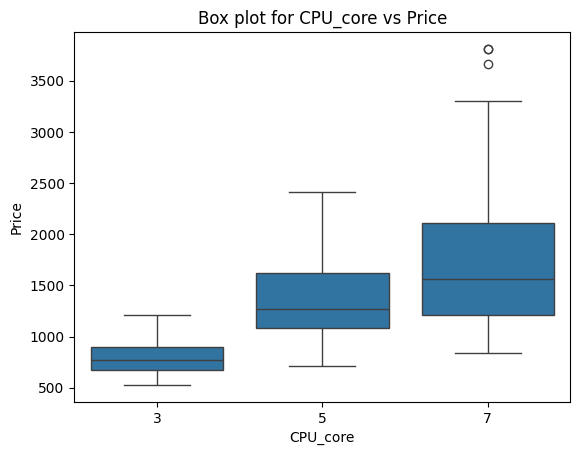

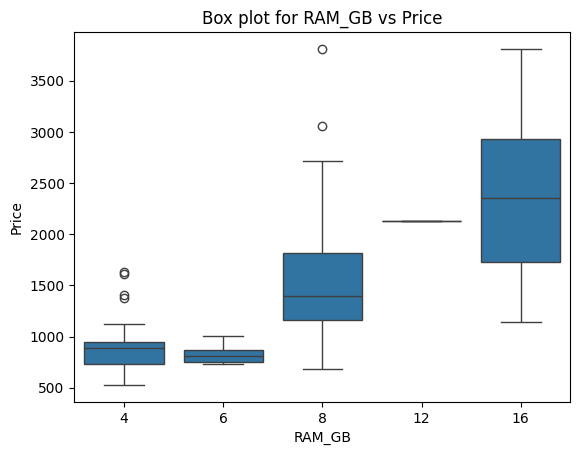

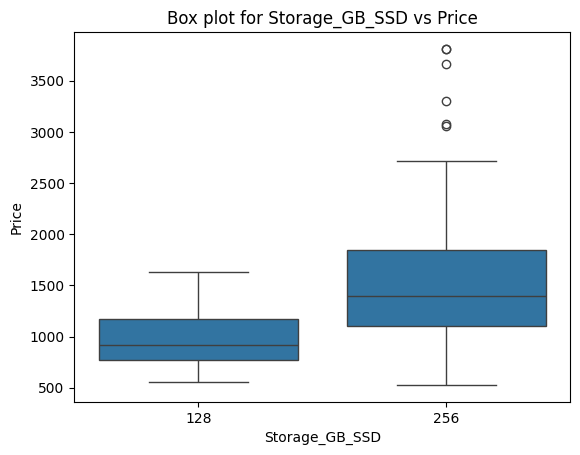

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create regression plots
data = pd.read_csv(URL)

regression_attributes = ['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds']
for attribute in regression_attributes:
    sns.regplot(x=attribute, y='Price', data=data)
    plt.title(f'Regression plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()

# 2. Create box plots
boxplot_attributes = ['Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD']
for attribute in boxplot_attributes:
    sns.boxplot(x=attribute, y='Price', data=data)
    plt.title(f'Box plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()

# **Evaluate dependence**

Usually, not all parameters in a data set have a direct or strong level of influence on the target variable. The level of influence is especially important for data scientists because the design of predictive models uses variables that affect the target variable the most.

To evaluate parametric interdependence, one can evaluate the correlation value, the Pearson coefficient, and p-values of different attributes with the target attribute.

Use the following prompt to write a prompt to evaluate dependence:

Write a Python code for the following.
1. Evaluate the correlation value, pearson coefficient and p-values for all numerical attributes against the target attribute "Price".
2. Don't include the values evaluated for target variable against itself.
3. Print these values as a part of a single dataframe against each individual attrubute.

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Assuming your dataframe has a target attribute 'Price'
df = pd.read_csv(URL)

# Select numerical attributes
numerical_attributes = df.select_dtypes(include=np.number)

# Calculate correlation values for all numerical attributes against 'Price'
correlation_values = numerical_attributes.corr()['Price'].drop('Price')

# Calculate Pearson coefficient and p-values for all numerical attributes against 'Price'
pearson_coefficients = []
p_values = []

for column in numerical_attributes.columns:
    if column != 'Price':
        pearson_coefficient, p_value = pearsonr(numerical_attributes[column], df['Price'])
        pearson_coefficients.append(pearson_coefficient)
        p_values.append(p_value)

# Create a new dataframe to store the results
results_df = pd.DataFrame({'Attribute': correlation_values.index, 'Correlation Value': correlation_values, 'Pearson Coefficient': pearson_coefficients, 'P-value': p_values})

# Print the results
print(results_df)

                         Attribute  Correlation Value  Pearson Coefficient  \
Unnamed: 0.1          Unnamed: 0.1           0.321933             0.321933   
Unnamed: 0              Unnamed: 0           0.321933             0.321933   
Category                  Category           0.286243             0.286243   
GPU                            GPU           0.288298             0.288298   
OS                              OS          -0.221730            -0.221730   
CPU_core                  CPU_core           0.459398             0.459398   
Screen_Size_inch  Screen_Size_inch          -0.110644            -0.110644   
CPU_frequency        CPU_frequency           0.366666             0.366666   
RAM_GB                      RAM_GB           0.549297             0.549297   
Storage_GB_SSD      Storage_GB_SSD           0.243421             0.243421   
Weight_pounds        Weight_pounds          -0.050312            -0.050312   
Screen-Full_HD      Screen-Full_HD          -0.021075           

# **Grouping and pivots**

You can perform another form of exploratory data analysis by grouping different variables to create a pivot table, which serves as a matrix of different combinations of values as seen in the grouped variables. The respective value of the matrix is the average of all values of the target attribute that have the same combination. You can view this kind of matrix using a pcolor plot.

Say you need to create a group with parameters GPU, CPU_core and Price. You need a Pivot table, considering Price as the target variable and pcolor plot for that table.

You can follow the following prompt as an example:

Write a python code that performs the following actions.
1. Group the attributes "GPU", "CPU_core" and "Price", as available in a dataframe df
2. Create a pivot table for this group, assuming the target variable to be 'Price' and aggregation function as mean
3. Plot a pcolor plot for this pivot table.

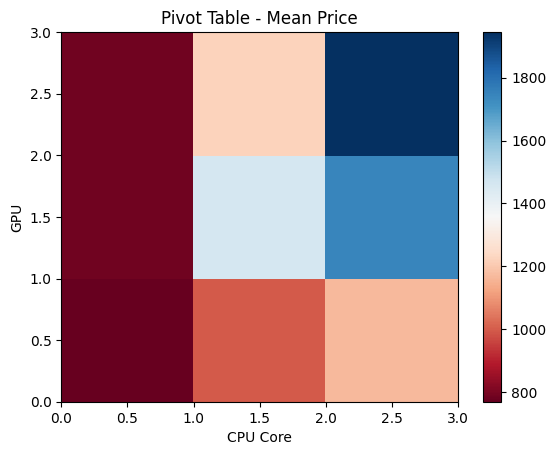

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Import the data set as a pandas DataFrame
df = pd.read_csv(URL)

# Group the attributes
grouped_data = df.groupby(['GPU', 'CPU_core'])['Price'].mean()

# Create a pivot table
pivot_table = pd.pivot_table(df, values='Price', index='GPU', columns='CPU_core', aggfunc='mean')

# Plot a pcolor plot
plt.pcolor(pivot_table, cmap='RdBu')
plt.colorbar()
plt.title('Pivot Table - Mean Price')
plt.xlabel('CPU Core')
plt.ylabel('GPU')
plt.show()

# **Conclusion**

Congratulations! You have completed this lab about generating data insights using generative AI tools.

Now you should be able to build efficient and helpful prompts that can create code to:

Generate statistical descriptions of the data
Create visualizations, such as regression plots and box plots, to understand the distribution of the data set against the target variable
Evaluate the dependence of different attributes against the target attribute
Group different variables to create a pivot table and visualize the data using a pcolor plot